# Stock Forecasting using PyAF to Cross Validation

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyaf.ForecastEngine as autof

import yfinance as yf
yf.pdr_override()

In [2]:
stock = 'AMD' # input
start = '2017-01-01' # input 
end = '2021-11-08'  # input
df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,11.42,11.65,11.02,11.43,11.43,55182000
2017-01-04,11.45,11.52,11.24,11.43,11.43,40781200
2017-01-05,11.43,11.69,11.23,11.24,11.24,38855200
2017-01-06,11.29,11.49,11.11,11.32,11.32,34453500
2017-01-09,11.37,11.64,11.31,11.49,11.49,37304800


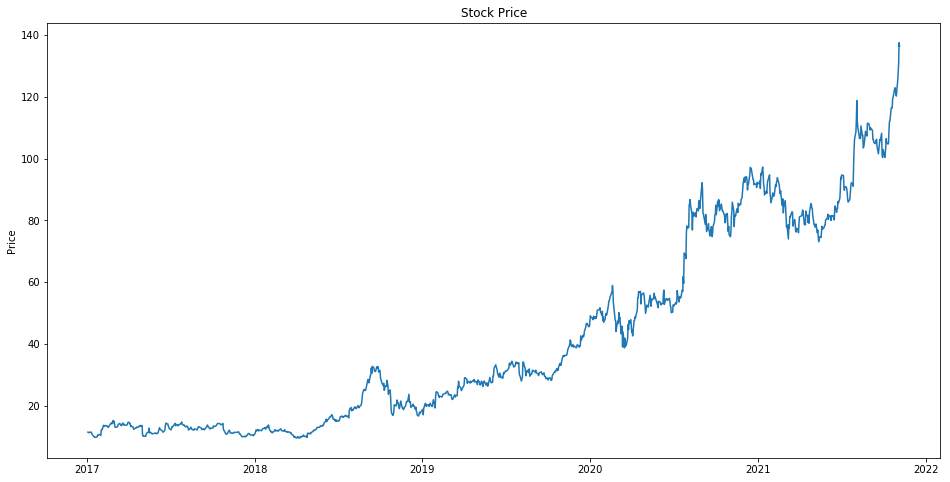

In [4]:
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [18]:
df = df.reset_index()
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1216,2021-11-01,119.449997,125.669998,118.129997,125.230003,125.230003,54559800
1217,2021-11-02,124.980003,128.460007,124.199997,127.629997,127.629997,53491900
1218,2021-11-03,127.750000,130.600006,126.790001,130.529999,130.529999,59537800
1219,2021-11-04,132.009995,139.000000,130.770004,137.500000,137.500000,84825200
1220,2021-11-05,139.190002,141.220001,134.419998,136.339996,136.339996,64878000


In [19]:
df2 = df.resample('M', on='Date').mean()

In [20]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,10.686000,10.887500,10.451000,10.649000,10.649000,4.394452e+07
2017-02-28,13.400526,13.811053,13.098421,13.504737,13.504737,8.273683e+07
2017-03-31,13.825217,14.058696,13.508261,13.802174,13.802174,7.537362e+07
2017-04-30,13.331053,13.520526,13.088421,13.298421,13.298421,4.965176e+07
2017-05-31,11.079091,11.329091,10.784091,11.051364,11.051364,7.801986e+07


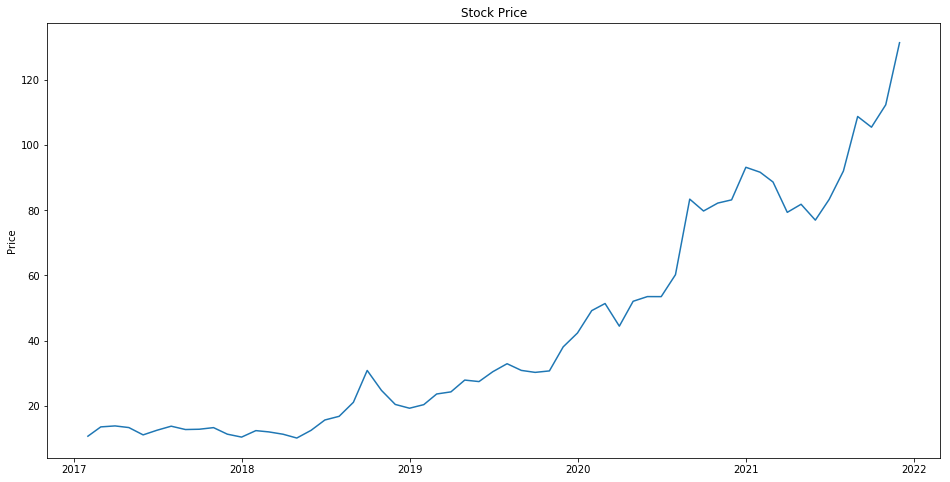

In [21]:
plt.figure(figsize=(16,8))
plt.plot(df2['Adj Close'])
plt.title('Stock Price')
plt.ylabel('Price')
plt.show()

In [26]:
df2  = df2.reset_index()
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
54,2021-07-31,91.491905,93.376667,89.867143,92.046667,92.046667,5.419630e+07
55,2021-08-31,108.734091,111.311819,106.881364,108.794091,108.794091,9.081971e+07
56,2021-09-30,105.859047,106.943810,104.228571,105.506667,105.506667,4.128634e+07
57,2021-10-31,111.741428,113.964285,110.684762,112.380952,112.380952,4.429250e+07
58,2021-11-30,128.675999,132.990002,126.862000,131.445999,131.445999,6.345854e+07


In [27]:
def create_model(iActivateCrossVal , iFolds):
    import pyaf.ForecastEngine as autof
    lEngine = autof.cForecastEngine()
    if(iActivateCrossVal):
        lEngine.mOptions.mCrossValidationOptions.mMethod = "TSCV";
        lEngine.mOptions.mCrossValidationOptions.mNbFolds = iFolds
    lEngine.train(df2[:-12] , 'Date' , 'Adj Close', 12);
    lEngine.getModelInfo();
    return lEngine

In [28]:
model_no_cross_valid = create_model(False , None)
model_with_cross_valid_5 = create_model(True , 5)
model_with_cross_valid_10 = create_model(True , 10)

INFO:pyaf.std:START_TRAINING 'Adj Close'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['Adj Close']' 3.313373327255249
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2017-01-31T00:00:00.000000 TimeMax=2020-11-30T00:00:00.000000 TimeDelta=<DateOffset: days=30> Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Adj Close' Length=47  Min=10.083809489295597 Max=83.41999925885882  Mean=29.946052827104815 StdDev=21.114291653321573
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Adj Close' Min=10.083809489295597 Max=83.41999925885882  Mean=29.946052827104815 StdDev=21.114291653321573
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Adj Close_Lag1Trend_residue_Seasonal_WeekOfYear_residue_NoAR' [Lag1Trend + Seasonal_WeekOfYear + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Adj Close_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Adj Close_Lag1Trend_residue_Seasonal_WeekOfYear' [Seasonal_WeekOfYear]
INFO:pyaf.std:AUTOREG_DETAIL '_Adj C

In [29]:
model_no_cross_valid_forecast = model_no_cross_valid.forecast(df2, 12)
model_with_cross_valid_10_forecast = model_with_cross_valid_10.forecast(df2, 12)
model_with_cross_valid_5_forecast = model_with_cross_valid_5.forecast(df2, 12)

INFO:pyaf.std:START_FORECASTING '['Adj Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Adj Close']' 0.14136099815368652
INFO:pyaf.std:START_FORECASTING '['Adj Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Adj Close']' 0.13788795471191406
INFO:pyaf.std:START_FORECASTING '['Adj Close']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['Adj Close']' 0.13838481903076172


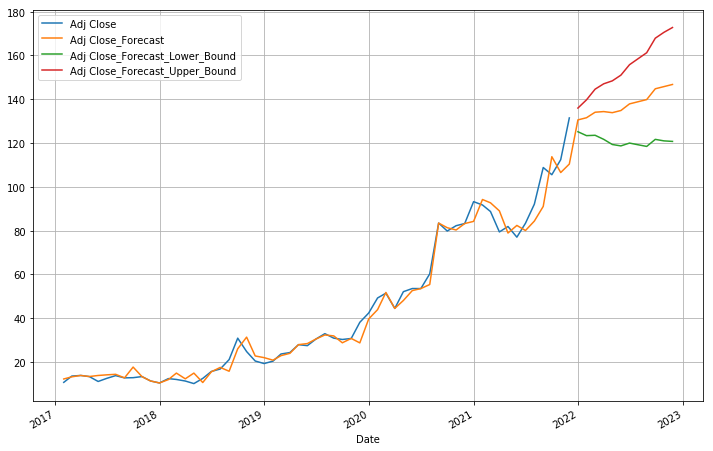

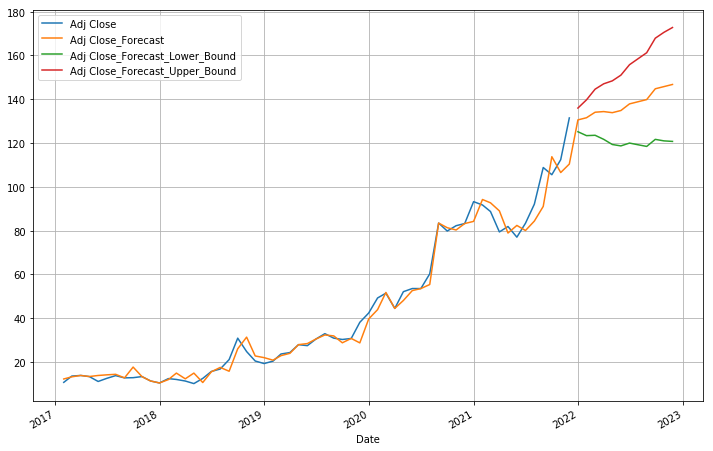

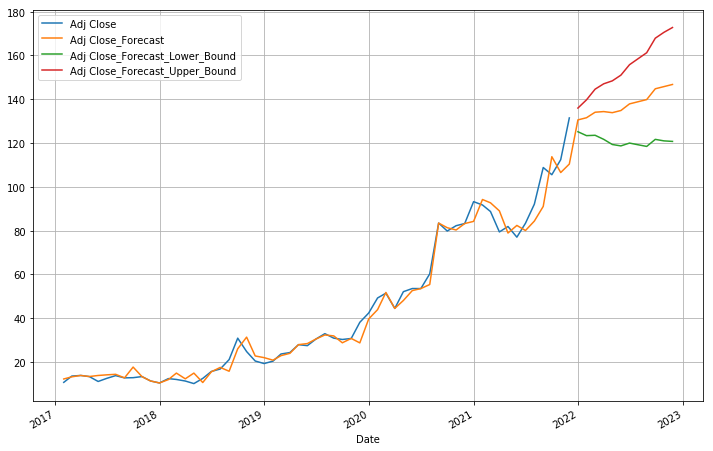

In [32]:
model_no_cross_valid_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_10_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))
model_with_cross_valid_5_forecast.plot.line('Date', ['Adj Close' , 'Adj Close_Forecast', 
                                             'Adj Close_Forecast_Lower_Bound', 
                                             'Adj Close_Forecast_Upper_Bound'], grid = True, figsize=(12, 8))